In [1]:
using Catalyst
using DifferentialEquations
using ReactionNetworkImporters
using WGLMakie
using Latexify
using LinearAlgebra

In [2]:
@parameters  b b λ α ϵ b α γ α b α b α
@variables t 
@species s(t) e(t) i(t) r(t) 
species = [s,e,i,r]
pars = [b,b,λ,α,ϵ,b,α,γ,α,b,α,b,α]
stoic = [1 -1 -1 1 0 0 0 0 0 0 0 0 0;0 0 1 0 -1 -1 1 0 0 0 0 0 0;0 0 0 0 1 0 0 -1 -1 -1 2 0 0;0 0 0 0 0 0 0 1 0 0 0 -1 1]
substoic₀ = [0 0 0 0; 1 0 0 0;1 0 1 0;1 0 1 0;0 1 0 0;0 1 0 0;0 1 1 0;0 0 1 0;0 0 1 0;0 0 1 0;0 0 2 0;0 0 0 1;0 0 1 1]
substoich=copy(transpose(substoic₀))
prodstoich = stoic + substoich

mn = MatrixNetwork(pars, substoich, prodstoich; species = species, params = pars)
prn = loadrxnetwork(mn)
rn = complete(prn.rn)
odesys=convert(ODESystem,rn)
reactioncomplexes(rn)
odesys

Model ##ReactionSystem#225 with 4 equations
States (4):
  s(t)
  e(t)
  i(t)
  r(t)
Parameters (5):
  b
  λ
  α
  ϵ
  γ

In [4]:
deficiency(rn)

5

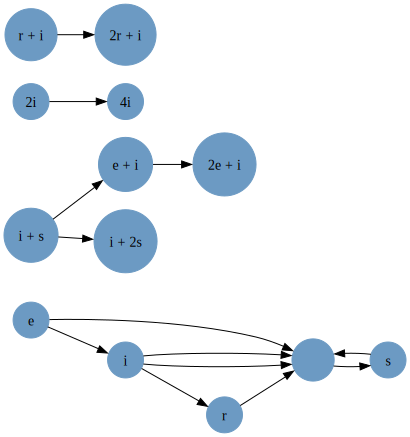

In [3]:
complexgraph(rn)

In [5]:
g=complexgraph(rn)
savegraph(g,"seir.png")